## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import pandas as pd

def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [7]:
data = get_data(data_path='motorbike_ambulance_calls.csv')

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [8]:
data.info()
data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [9]:
missing_values = data.isnull().sum()
print(missing_values)

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

1. Завантажив дані, вивів статистику та розмірність датасету.  
2. Перевірив типи даних та кількість записів по кожній змінній.
3. Перевірив наявність пропусків даних - всі дані повні.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [12]:
from datetime import datetime

def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], format='%d/%m/%Y')
  return df
  
data = tranform_date(data, 'date')


In [13]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


In [17]:
#your conclusions
# 0. Використав бібліотеку datetime.
# 1. Перетворення типи даних: "date" було успішно перетворено за допомогою pd.to_datetime().
# 2. format='%d/%m/%Y' - день\місяць\рік
# 3. Часові межі датасету: Перший запис - First day of dataset - YYYY-MM-DD, останній запис - Last day of dataset - YYYY-MM-DD.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [16]:
categorical_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']

data_categorical = data[categorical_cols].copy()

print(data_categorical)

       season  holiday  weekday  workingday  weathersit
0      spring        0        6           0           1
1      spring        0        6           0           1
2      spring        0        6           0           1
3      spring        0        6           0           1
4      spring        0        6           0           1
...       ...      ...      ...         ...         ...
17374  spring        0        1           1           2
17375  spring        0        1           1           2
17376  spring        0        1           1           1
17377  spring        0        1           1           1
17378  spring        0        1           1           1

[17379 rows x 5 columns]


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [23]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  season_mapping = {'spring': 1.1, 'summer': 2.2, 'autumn': 3.3, 'fall': 3.4, 'winter': 4.4}
  
  df[season_col_name] = df[season_col_name].map(season_mapping)
  return df
  
data = encode_season(data, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

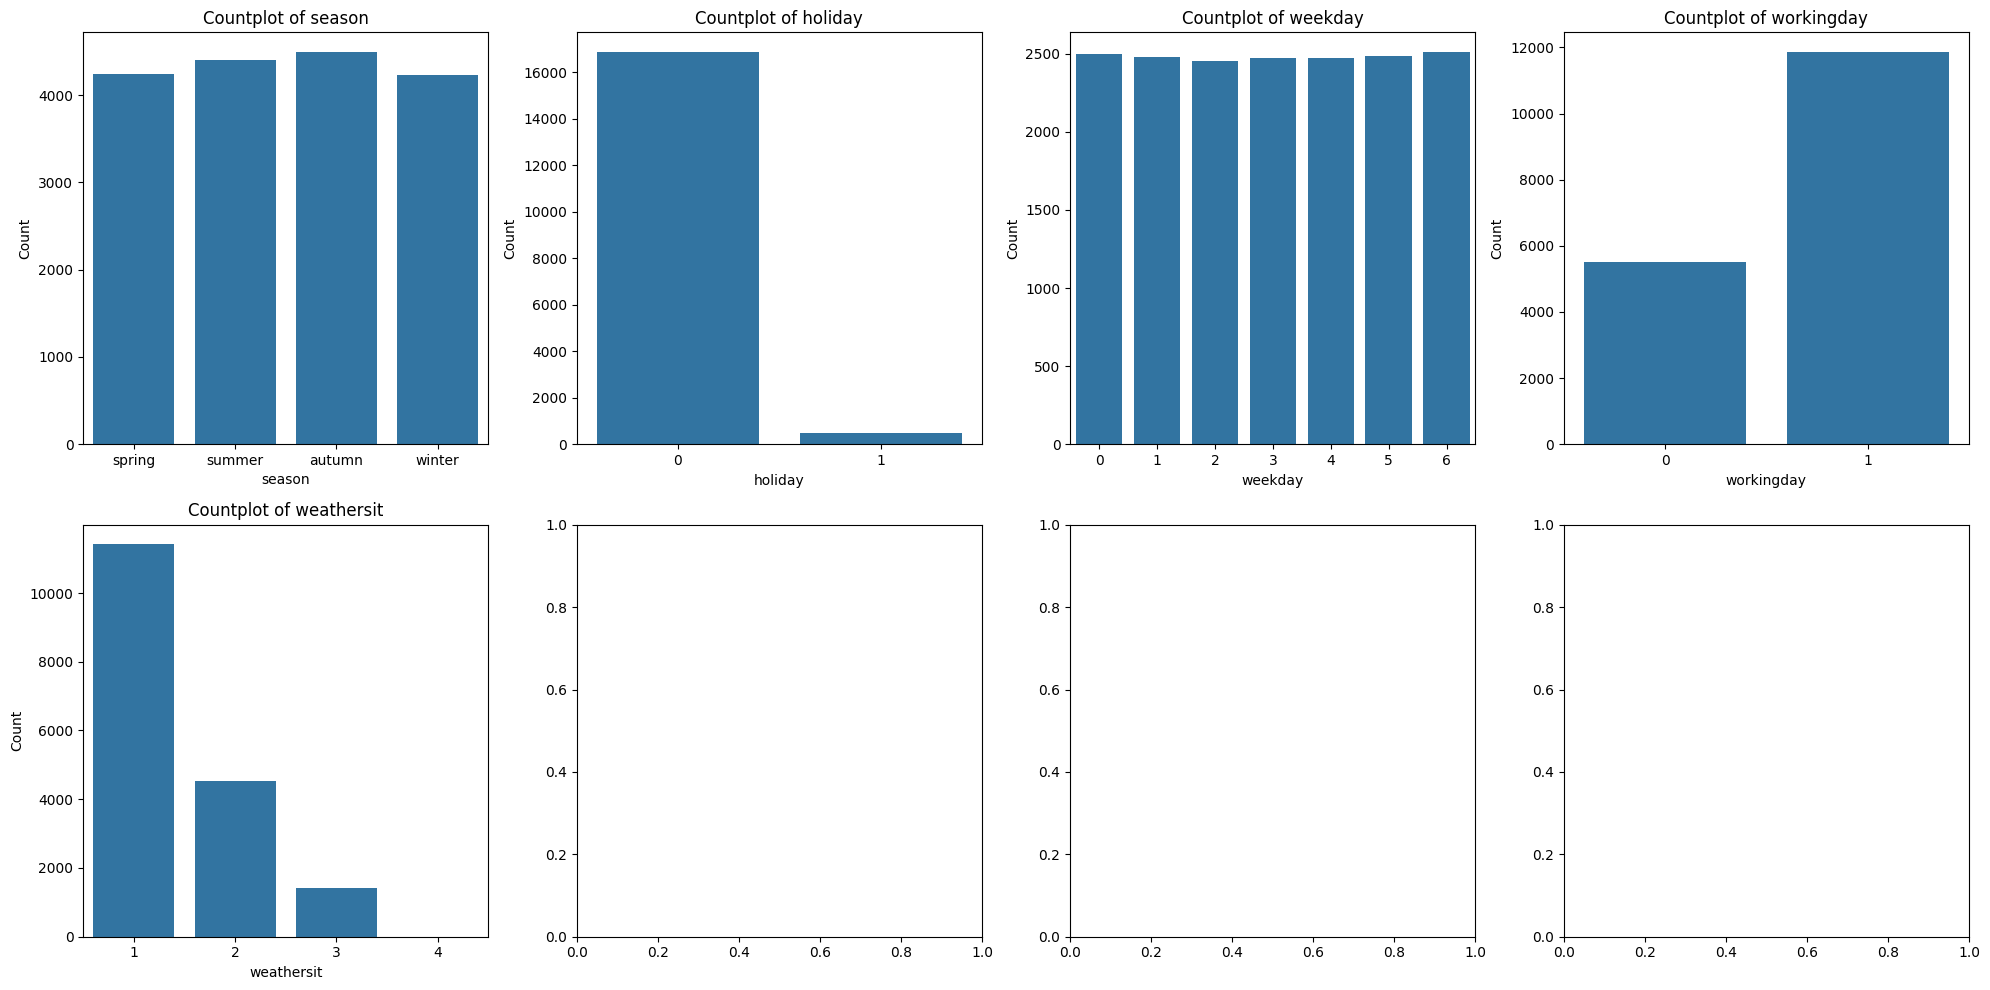

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=variable, data=data_categorical, ax=subplot)
  subplot.set_title(f'Countplot of {variable}')
  subplot.set_xlabel(variable)
  subplot.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**



1. (Завдання 5) Виділення категоріальних змінних:
Було створено новий датасет data_categorical, який містить тільки категоріальні змінні, такі як (season, holiday, weekday, workingday і weathersit).
2. (Завдання 6) Перетворення змінної season в числову шкалу:
Змінна season була успішно перетворена в числову шкалу, використав map і кожному категоріальному знченнню було присвоєнно значення(spring, summer, autumn, fall, winter).
3. (Завдання 7) Побудова графіків countplot для категоріальних змінних:
Побудовав графіки countplot для кожної категоріальної змінної з датасету data_categorical. На графіках відображено кількість спостережень для кожної категорії кожної змінної.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [26]:
data_numerical = data.select_dtypes(include=['float64', 'int64'])

print(data_numerical.head())

   index  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0      1     NaN   0     1   0        0        6           0           1   
1      2     NaN   0     1   1        0        6           0           1   
2      3     NaN   0     1   2        0        6           0           1   
3      4     NaN   0     1   3        0        6           0           1   
4      5     NaN   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

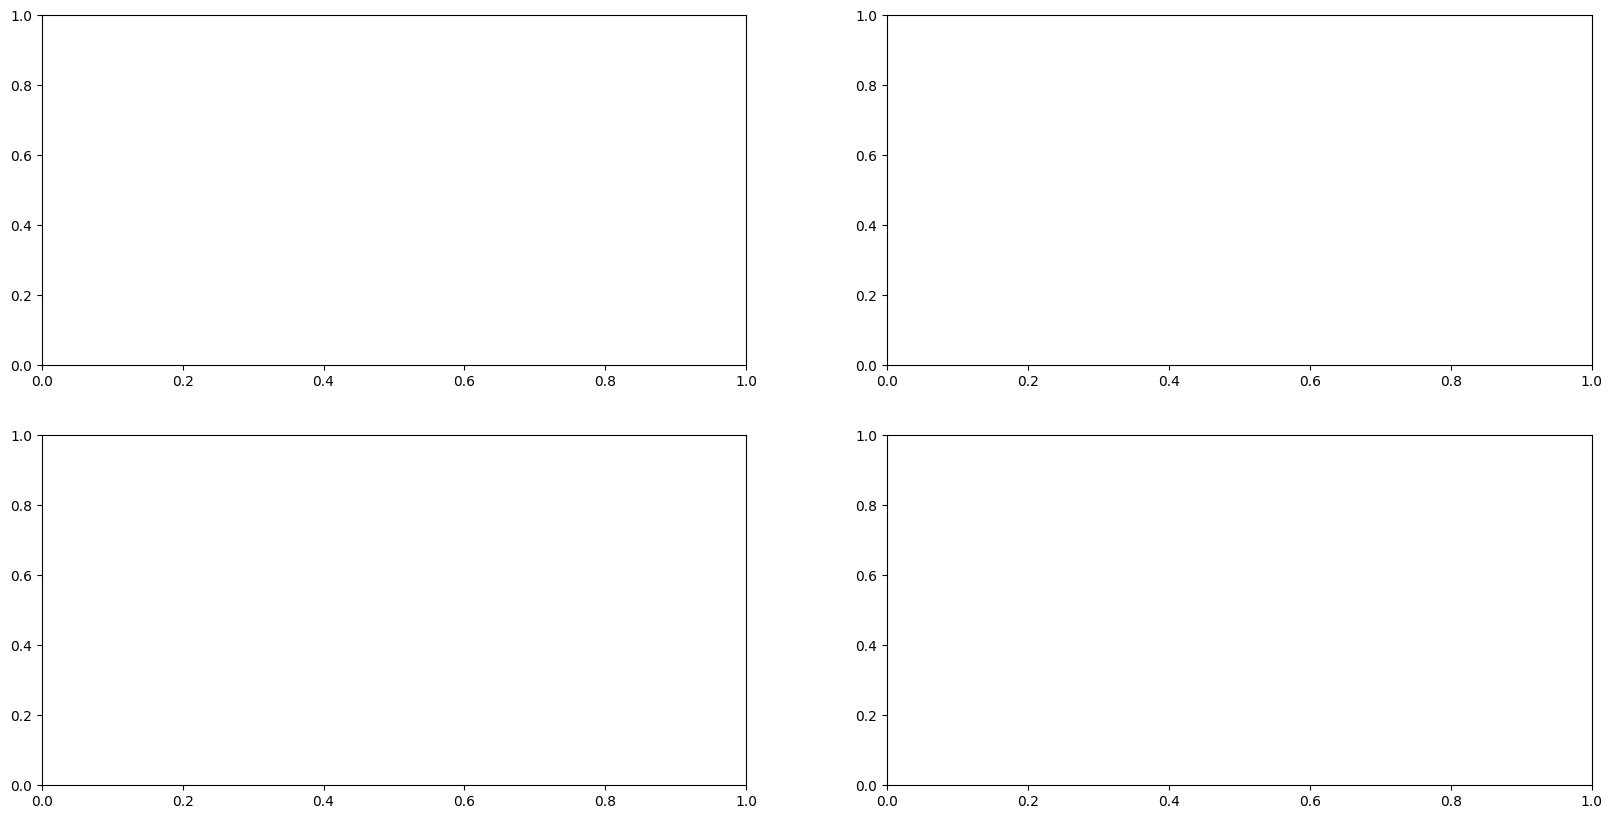

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
#your code

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

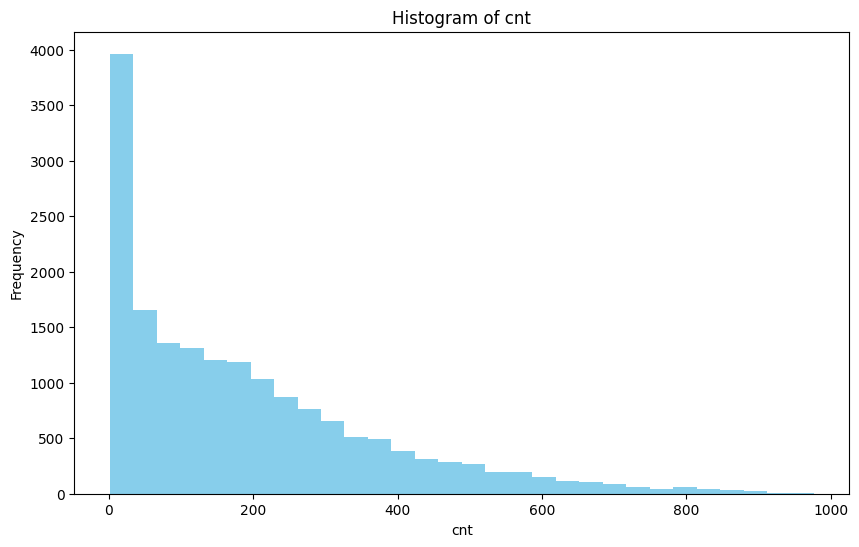

Slope coefficient: 0.010064609532772014


In [36]:
import numpy as np
from scipy.stats import linregress  # якщо не працює треба встановити scipy (pip install scipy)

plt.figure(figsize=(10, 6))
plt.hist(data['cnt'], bins=30, color='skyblue')
plt.title('Histogram of cnt')
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.show()

x = np.arange(len(data)) 
y = data['cnt']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope coefficient: {slope}")


**Висновки з 8-10 завдання (детальні)**

1. (Завдання 8) Виділення числових змінних:
- Було створено новий датасет data_numerical, який містить лише числові змінні з вихідного датасету.   
2. (Завдання 10) Побудова гістограм розподілу для числових змінних:
- була побудована гістограма розподілу, що дозволяє оцінити розподіл та концентрацію значень.
- Під час побудови гістограм було виявлено, що деякі змінні можуть мати асиметричний розподіл або наявність викидів, що може вплинути на подальший аналіз.
3. (Завдання 9) Я не зробив 



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

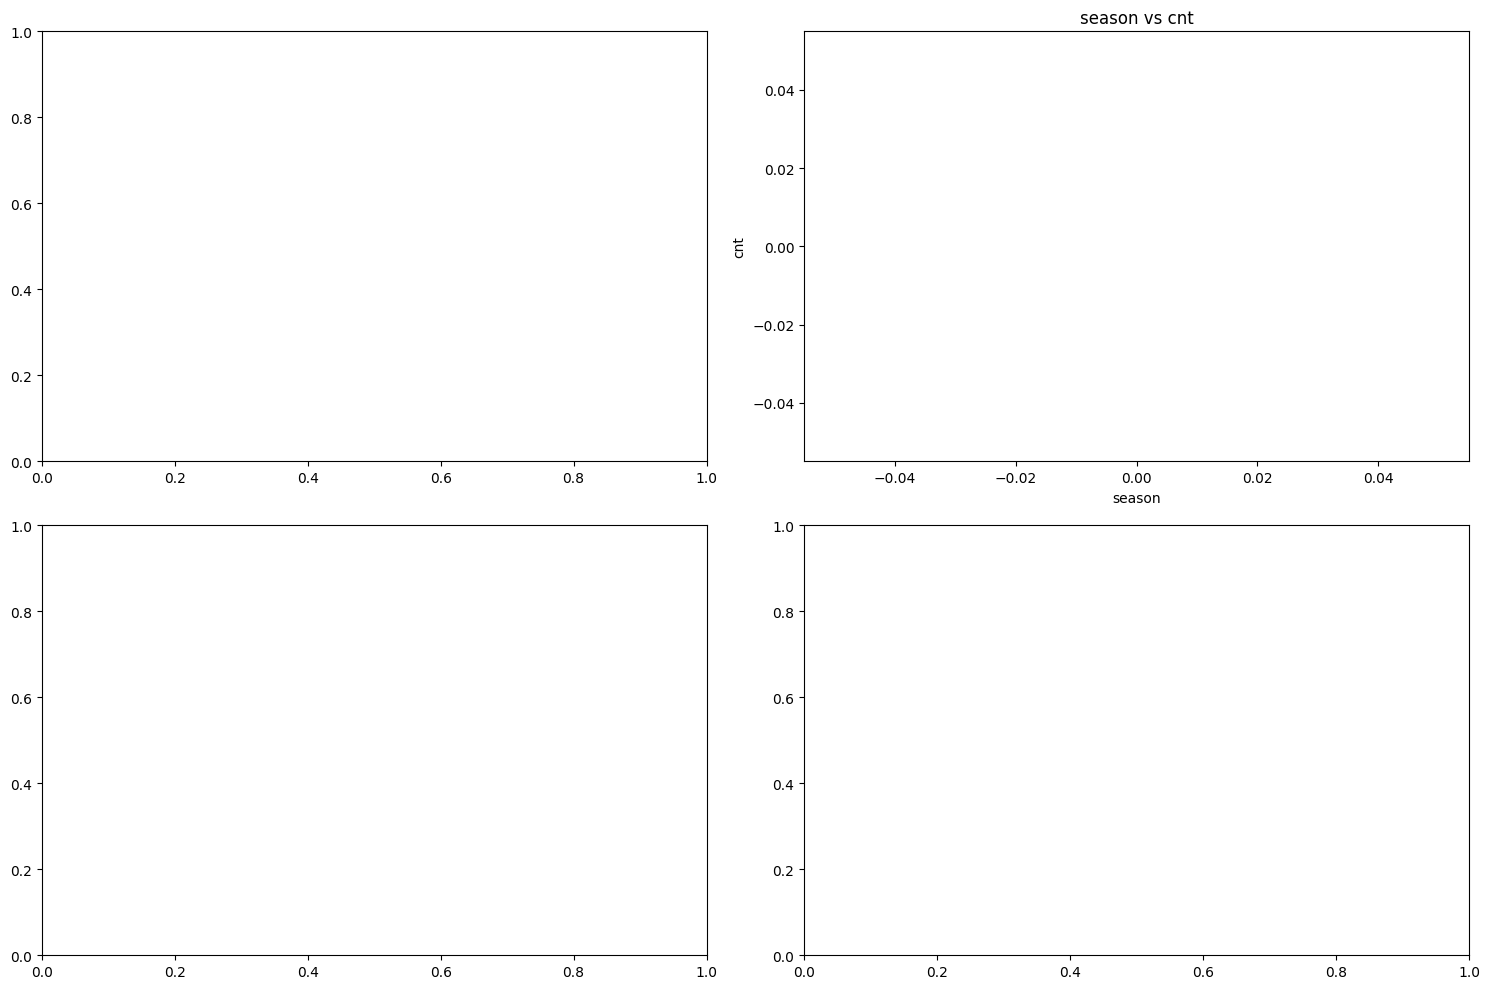

In [37]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  #your code
  row_idx = idx // 2
  col_idx = idx % 2
  ax[row_idx, col_idx].scatter(data_numerical[col], data_numerical['cnt'], alpha=0.5)
  ax[row_idx, col_idx].set_title(f'{col} vs cnt')
  ax[row_idx, col_idx].set_xlabel(col)
  ax[row_idx, col_idx].set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

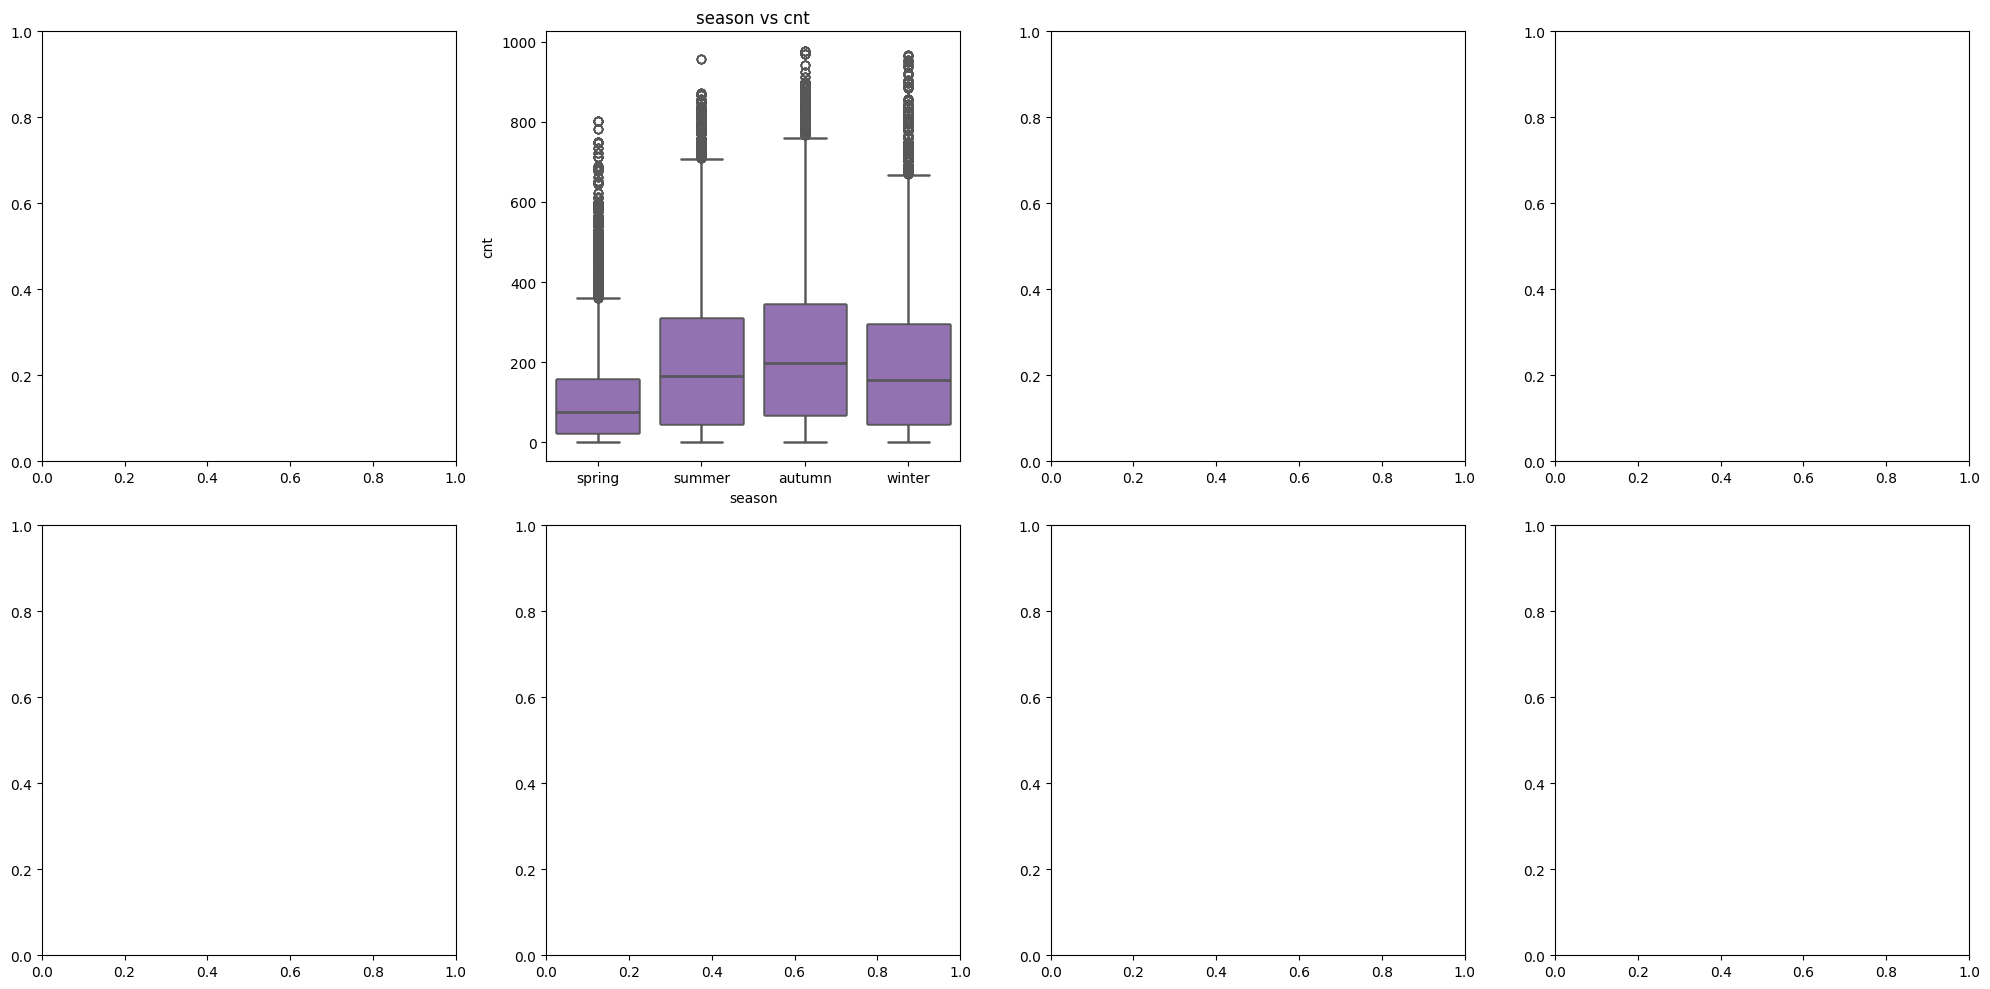

In [38]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  row_idx = idx // 4
  col_idx = idx % 4
  sns.boxplot(x=data_categorical[col], y=data['cnt'], ax=ax[row_idx, col_idx])
  ax[row_idx, col_idx].set_title(f'{col} vs cnt')

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**

1. Завдання 11 (графіки scatterplot):
- Побудовано графіки співвідношення scatterplot між кожною числовою змінною та цільовою змінною cnt.
- На графіках можна спостерігати різні взаємозв'язки між змінними. Наприклад, є як лінійні, так і не лінійні залежності.
2. Завдання 12 (графіки boxplot):
- Побудовано графіки співвідношення boxplot між кожною категоріальною змінною та цільовою змінною cnt.
- На графіках можна спостерігати розподіл цільової змінної в залежності від кожної категоріальної змінної. Вони дозволяють порівняти медіани, викиди для кожної категорії.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

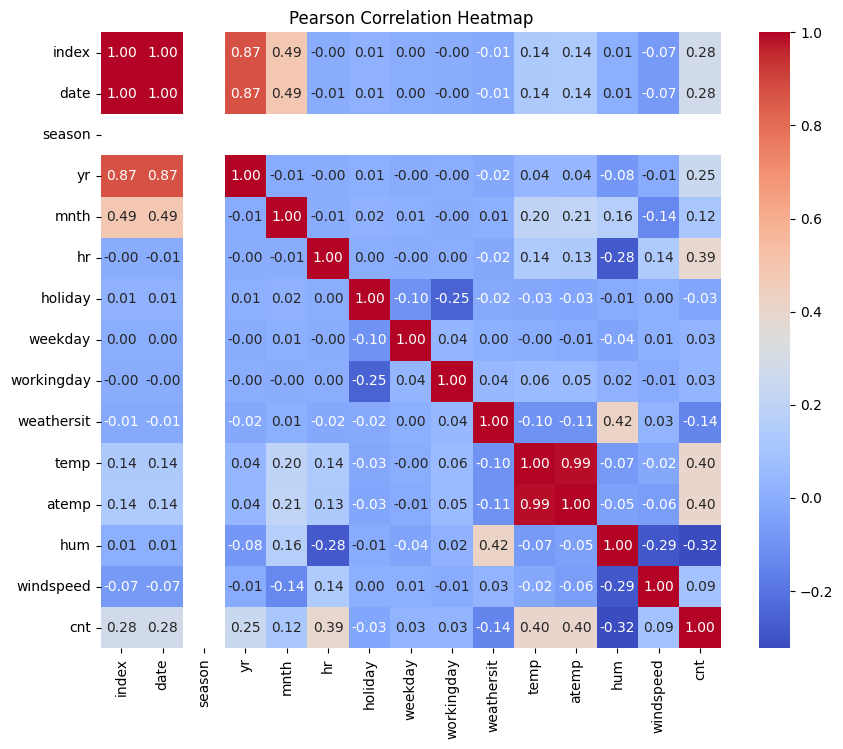

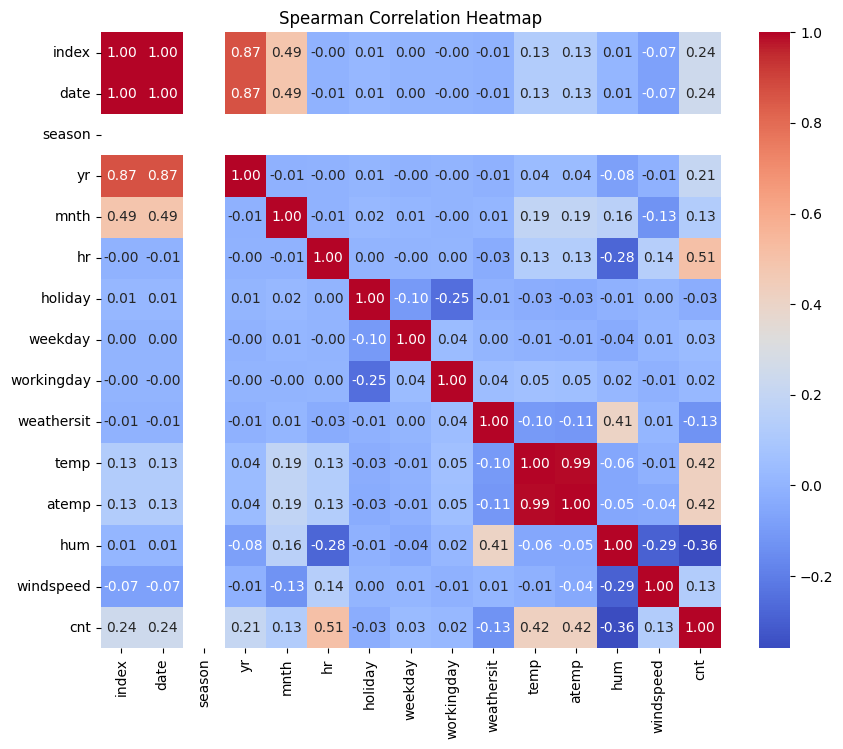

In [46]:
#1-2 
pearson_corr = data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Pearson Correlation Heatmap")
plt.show()

#3-4
spearman_corr = data.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Spearman Correlation Heatmap")
plt.show()

#5

In [49]:
#your conclusions

# Опис отриманих результатів:
# - Коефіцієнти кореляції показують ступінь лінійної залежності між парами змінних у наборі даних.
# - Значення кореляційних коефіцієнтів можуть бути в межах від -1 до 1. Значення близькі до 1 вказують на сильну позитивну кореляцію, близькі до -1 - на сильну негативну кореляцію, а значення близькі до 0 - на відсутність кореляції.
# - Метод Пірсона вимірює лінійну залежність між змінними, тоді як метод Спірмана вимірює будь-яку монотонну залежність між змінними, не обов'язково лінійну.
# - Відмінність між методами полягає у врахуванні впорядкування значень. Метод Пірсона підраховує кореляцію на основі фактичних значень змінних, 
# тоді як метод Спірмана використовує рангові значення. Тому метод Спірмана є менш чутливим до викидів і має більш широке застосування в ситуаціях, коли взаємозв'язок між змінними може бути не лінійним.
# - У випадку, коли змінні мають нелінійний зв'язок або викиди, корисно використовувати метод Спірмана, в інших випадках метод Пірсона може бути більш підходящим.
 

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [50]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      # example:
                      pd.get_dummies(df['season']),
                      #YOUR CODE
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return fetures

In [51]:
features = get_dummies(data)

NameError: name 'fetures' is not defined

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [ ]:
features['night_hours'] = #your code
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [ ]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [ ]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = #your code (all features)
  y = #your code (target variable)
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [ ]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**

я не зробив бо не зрозумів , що саме треба зробити

1.   
2.   
3. ...

